In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 더 예쁘게 시각화 가능 

airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights = pd.read_csv("flights.csv", low_memory=False)
airlines.info()
airports.info()
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  

In [12]:
#기초 처리
flights.groupby(['AIRLINE', 'ORIGIN_AIRPORT']).size()
flights.groupby(['AIRLINE', 'ORIGIN_AIRPORT']).size().sort_values(ascending=False)
flights.groupby(['AIRLINE', 'ORIGIN_AIRPORT']).size().reset_index(name='n')
crosstab = (flights.groupby(['AIRLINE', 'ORIGIN_AIRPORT']).size()
.reset_index(name='n').
sort_values(['n', 'AIRLINE', 'ORIGIN_AIRPORT'], ascending=[False, False, False], ignore_index=True))

In [13]:
#inner join
(crosstab
.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner', suffixes=('', '_y')).drop(['IATA_CODE'], axis=1)
.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner', suffixes=('','_y')).drop('IATA_CODE', axis=1)
)

,AIRLINE,ORIGIN_AIRPORT,n,AIRLINE_y,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,DL,ATL,221705,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
1,AA,ATL,7498,American Airlines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
2,WN,ATL,39513,Southwest Airlines Co.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
3,MQ,ATL,1295,American Eagle Airlines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
4,UA,ATL,3405,United Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
...,...,...,...,...,...,...,...,...,...,...
1299,F9,ILG,100,Frontier Airlines Inc.,Wilmington Airport,Wilmington,DE,USA,39.67872,-75.60653
1300,NK,ACY,3572,Spirit Air Lines,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
1301,NK,LBE,1281,Spirit Air Lines,Arnold Palmer Regional Airport,Latrobe,PA,USA,40.27594,-79.40480
1302,NK,IAG,322,Spirit Air Lines,Niagara Falls International Airport,Niagara Falls,NY,USA,43.10726,-78.94538


In [14]:
#semi join
crosstab[crosstab['AIRLINE'].isin(airlines['IATA_CODE'])][crosstab['ORIGIN_AIRPORT'].isin(airports['IATA_CODE'])]

,AIRLINE,ORIGIN_AIRPORT,n
0,DL,ATL,221705
1,AA,DFW,134270
2,WN,MDW,76350
3,WN,LAS,68520
4,WN,BWI,64063
...,...,...,...
2376,US,ILM,1
2377,US,GSO,1
2378,US,DSM,1
2379,UA,AGS,1


# Covariation

(대충 인과추론이 얼마나 어려운지 강의 내용)

# ss

In [15]:
#cross-tabulation : 2 categorical variables
spread_df = pd.pivot_table(crosstab, values='n', index='ORIGIN_AIRPORT', columns='AIRLINE', fill_value=0).reset_index()
spread_df.columns.name=None
join_df = spread_df[spread_df['ORIGIN_AIRPORT'].isin(airports['IATA_CODE'])]
join_df = join_df.assign(n=join_df.sum(axis=1, numeric_only=True))
join_df.sort_values('n', ascending=False, inplace=True, ignore_index=True)

Text(120.72222222222221, 0.5, 'AIRLINE')

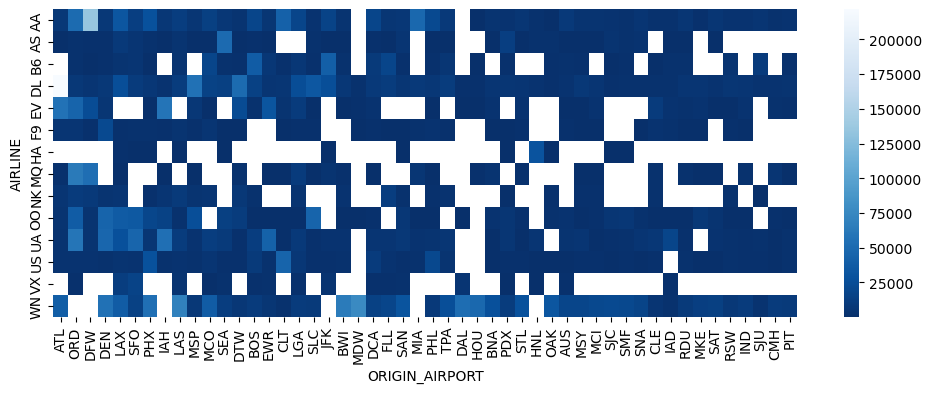

In [16]:
#
top_airports = (crosstab[crosstab['ORIGIN_AIRPORT'].isin(airports['IATA_CODE'])]
.groupby('ORIGIN_AIRPORT').agg(n=('n', 'sum')).reset_index())
top_airports = top_airports.sort_values('n', ascending=False, ignore_index=True).head(50)
filtered_crosstab = crosstab[crosstab['ORIGIN_AIRPORT'].isin(top_airports['ORIGIN_AIRPORT'])]
pivot_filtered = filtered_crosstab.pivot(index='AIRLINE', columns='ORIGIN_AIRPORT', values='n')[top_airports['ORIGIN_AIRPORT']]
plt.figure(figsize=(12, 4))
sns.heatmap(pivot_filtered, cmap='Blues_r')
plt.xlabel('ORIGIN_AIRPORT')
plt.ylabel('AIRLINE')

한마디로, joint count!

In [ ]:
#bubble chart
lt.figure(figsize=(15, 4))
sns.scatterplot(data=filtered_crosstab, x='ORIGIN_AIRPORT', y='AIRLINE', size='n', sizes=(50, 300))
plt.gca().legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, frameon=False)
plt.xticks(rotation=90)
plt.show()

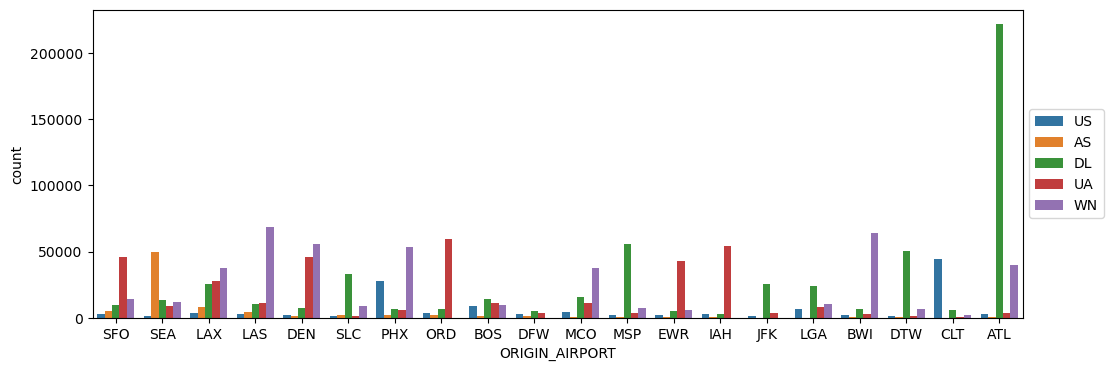

In [17]:
#grouped bar

top_airports = (crosstab[crosstab['ORIGIN_AIRPORT'].isin(airports['IATA_CODE'])]
.groupby('ORIGIN_AIRPORT').agg(n=('n', 'sum')).reset_index()
.sort_values(by='n', ascending=False, ignore_index=True).head(20))
filtered_flights = flights[flights['ORIGIN_AIRPORT'].isin(top_airports['ORIGIN_AIRPORT'])]
filtered_flights = filtered_flights[filtered_flights['AIRLINE'].isin(['AS', 'DL', 'WN', 'UA', 'US'])] 
plt.figure(figsize=(12, 4))
sns.countplot(x='ORIGIN_AIRPORT', hue='AIRLINE', data=filtered_flights)
plt.gca().legend(loc = 'center left', bbox_to_anchor = (1,0.5))

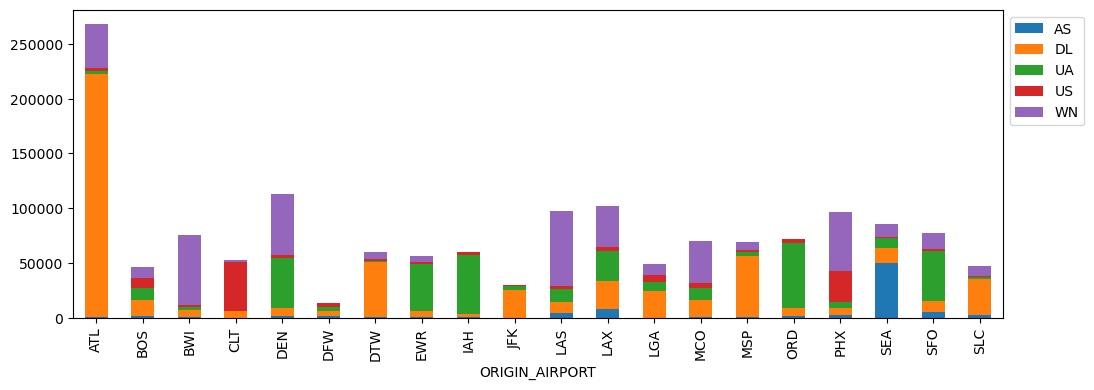

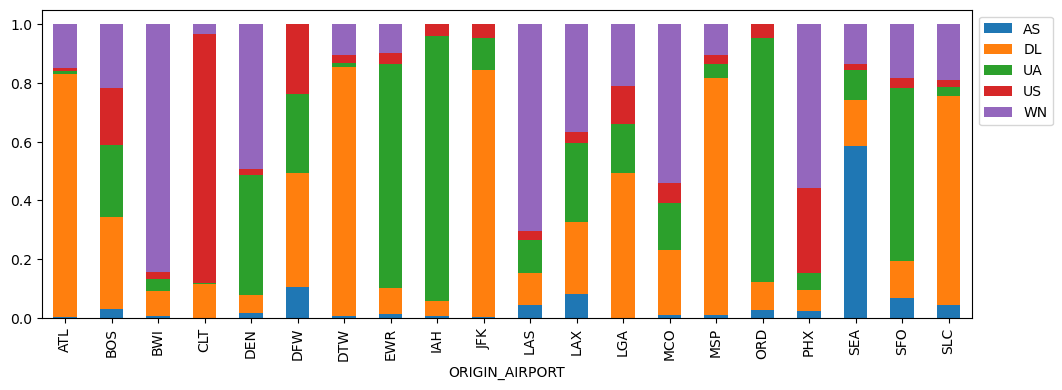

In [18]:
#stacked bar

stacked_df = (filtered_flights.
groupby(['AIRLINE', 'ORIGIN_AIRPORT']).size().reset_index(name='count')
.pivot(index='ORIGIN_AIRPORT', columns='AIRLINE', values='count'))
stacked_df.plot.bar(stacked=True, figsize=(12, 4))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
stacked_df.div(stacked_df.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(12,  4))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## 연속형 변수와 범주형 변수 교차

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 3), constrained_layout=True)
g = sns.histplot(data=filtered_flights, x="ARRIVAL_DELAY", hue="AIRLINE", multiple="dodge", fill=True, binwidth=10, ax=axs[0])
sns.move_legend(axs[0], loc = 'upper left', bbox_to_anchor = (1,1))
g.set_xlim(-120, 360)
g = sns.histplot(filtered_flights, x="ARRIVAL_DELAY", hue="AIRLINE", element='poly', fill=False, binwidth=10, ax=axs[1])
sns.move_legend(axs[1], loc='upper left', bbox_to_anchor=(1,1))
g.set_xlim(-120, 360)
g = sns.kdeplot(data=filtered_flights, x="ARRIVAL_DELAY", hue="AIRLINE", multiple="layer", fill=False, ax=axs[2])
sns.move_legend(axs[2], loc = 'upper left', bbox_to_anchor = (1,1))
g.set_xlim(-120, 360)

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 3), constrained_layout=True)
g = sns.boxplot(data = filtered_flights, x='ARRIVAL_DELAY', y='AIRLINE', showfliers=False, orient='h', ax=axs[0])
g.set_xlim(-120, 360)
g = sns.violinplot(data = filtered_flights, x='ARRIVAL_DELAY', y='AIRLINE', orient='h', ax=axs[1])
g.set_xlim(-120, 360)

## 연속변수 교차

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

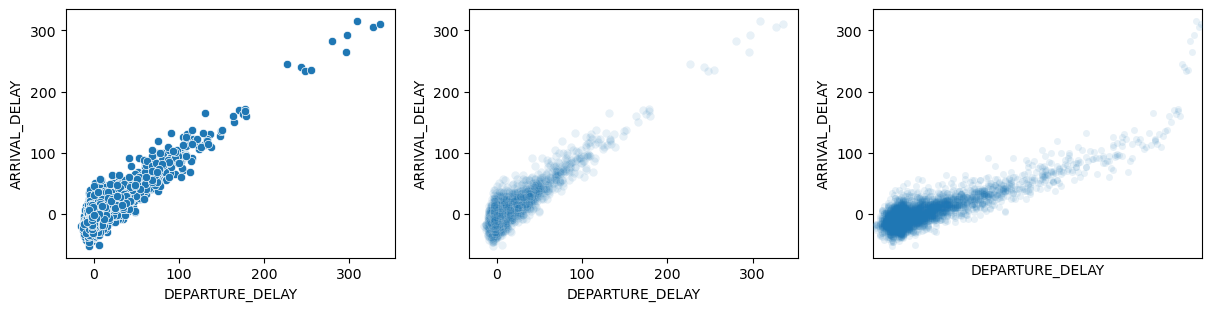

In [20]:
more_filtered_flights = filtered_flights.loc[(filtered_flights['MONTH']==1) &
(filtered_flights['DAY']==1) &
(~filtered_flights['DEPARTURE_DELAY'].isna()) &
(~filtered_flights['ARRIVAL_DELAY'].isna()) &
(filtered_flights['DEPARTURE_DELAY']<400) &
(filtered_flights['ARRIVAL_DELAY']<400)]
fig, axs = plt.subplots(ncols=3, figsize=(12, 3), constrained_layout=True)
sns.scatterplot(data=more_filtered_flights, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY", ax=axs[0])
sns.scatterplot(data=more_filtered_flights, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY", alpha=0.1, ax=axs[1])
g = sns.stripplot(data=more_filtered_flights, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY", alpha=0.1, jitter=True, ax=axs[2])
g.set_xticks([])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

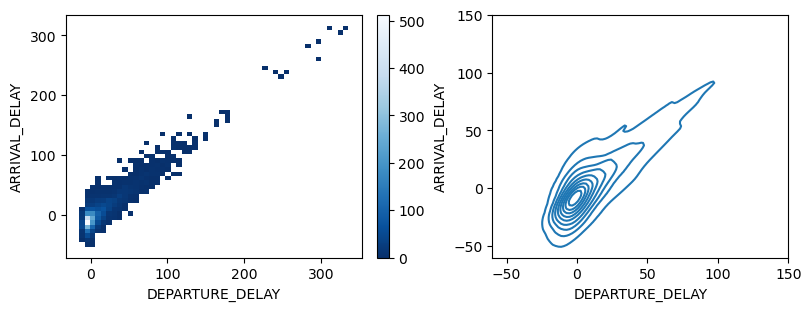

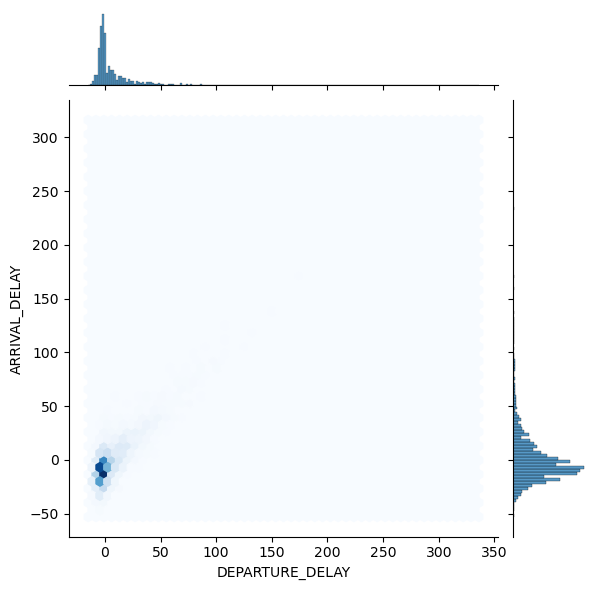

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3), constrained_layout=True)
sns.histplot(data=more_filtered_flights, x= 'DEPARTURE_DELAY', y='ARRIVAL_DELAY', bins=50, cmap='Blues_r', cbar=True, ax=axs[0])
g = sns.kdeplot(x=more_filtered_flights['DEPARTURE_DELAY'], y=more_filtered_flights['ARRIVAL_DELAY'], ax=axs[1])
g.set_xlim(-60, 150)
g.set_ylim(-60, 150)
sns.jointplot(data=more_filtered_flights, x= 'DEPARTURE_DELAY', y='ARRIVAL_DELAY', kind='hex', gridsize=50, cmap='Blues')

## More than 3 variables

<Axes: xlabel='DEPARTURE_DELAY', ylabel='ARRIVAL_DELAY'>

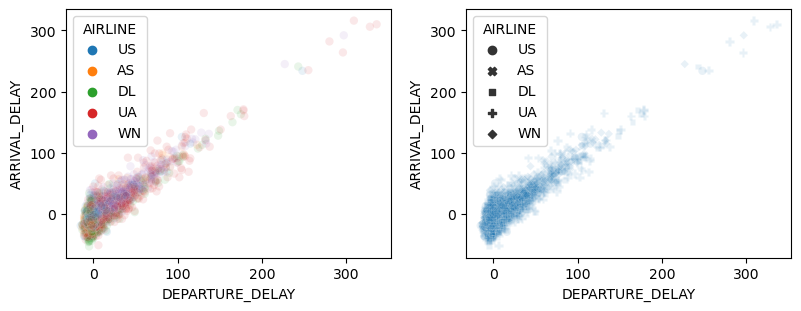

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3), constrained_layout=True)
sns.scatterplot(data=more_filtered_flights, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY", hue='AIRLINE', alpha=0.1, ax=axs[0])
sns.scatterplot(data=more_filtered_flights, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY", style='AIRLINE', alpha=0.1, ax=axs[1])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

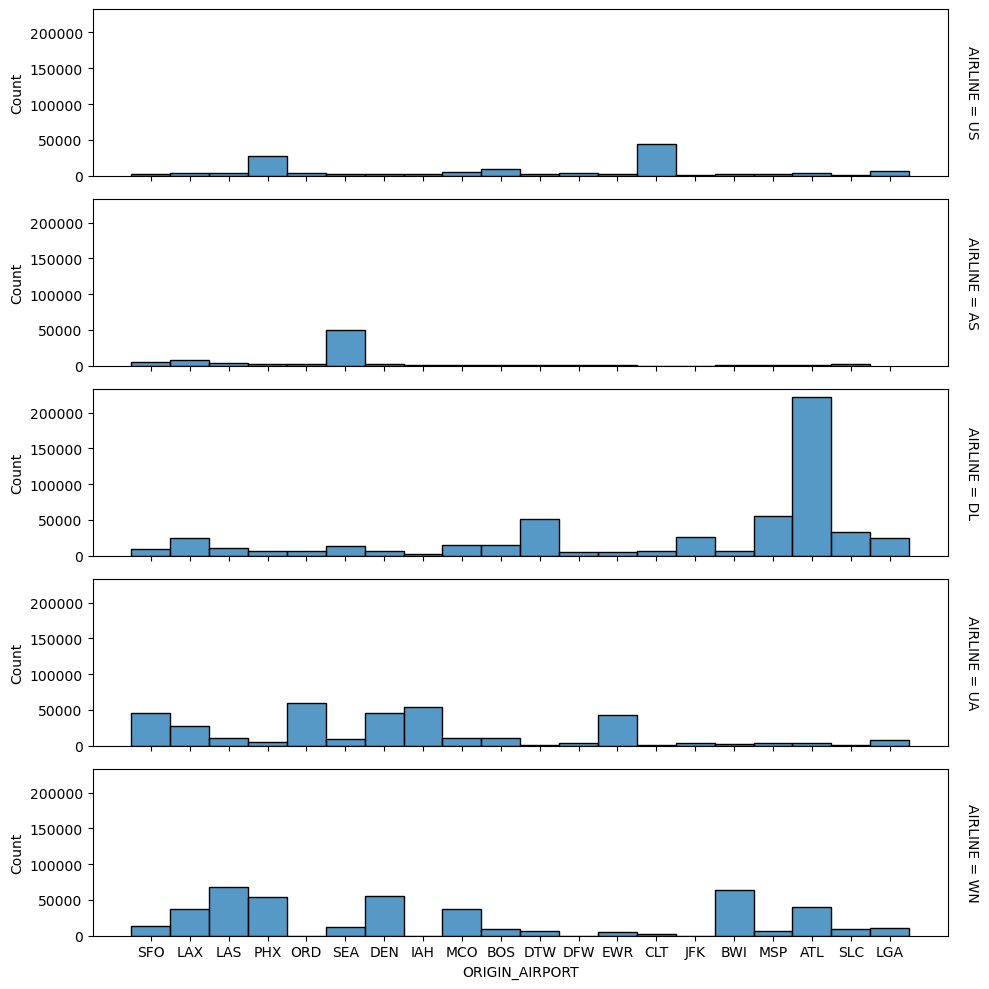

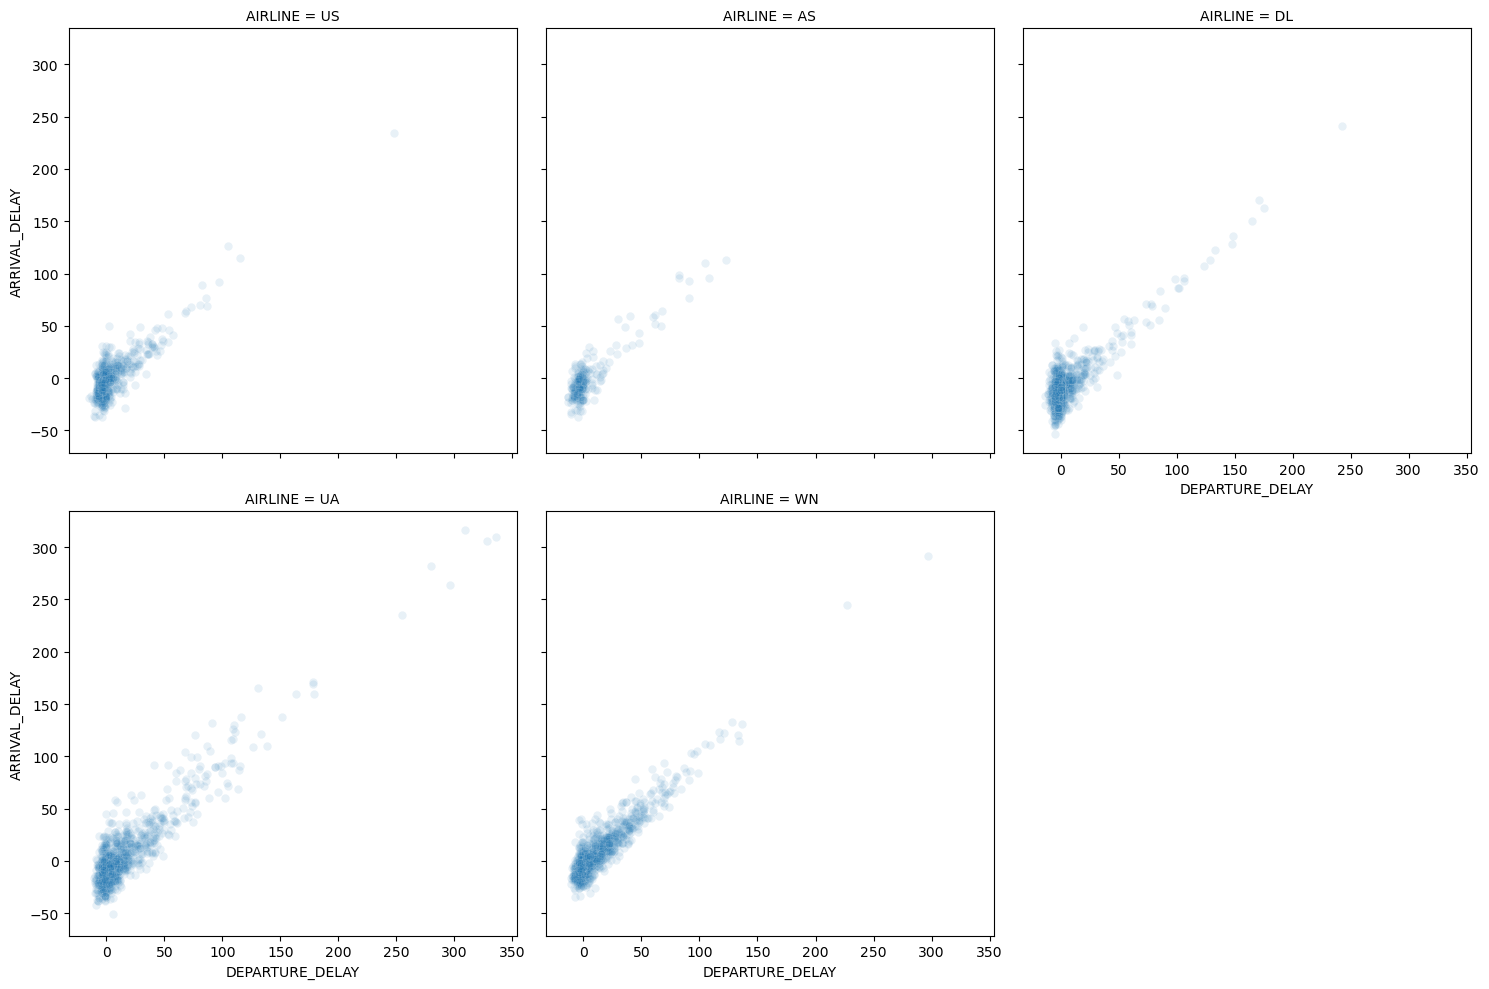

In [23]:
# Faucets
g = sns.FacetGrid(filtered_flights,  row="AIRLINE", despine=False,  margin_titles=True, height=2, aspect=5)
g.figure.subplots_adjust(wspace=0, hspace=0)
g.map_dataframe(sns.histplot, x="ORIGIN_AIRPORT")
plt.show()
sns.relplot(x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', data=more_filtered_flights, kind='scatter', alpha=0.1, col='AIRLINE', col_wrap=3, facet_kws={"despine" : False})
plt.show()